In [1]:
!pip install --upgrade scikit-learn joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 35.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
jumlah_nol = (df==0).sum()
print(jumlah_nol)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Angka 0 pada kolom ['Glucose', 'BloodPressure', 'SkinTHickness', 'Insulin', 'BMI'] itu tidak mungkin 0, berarti bisa dianggap nilai 0 pada kolom tersebut adalah missing value


In [9]:
cols_nol = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[cols_nol] = df[cols_nol].replace(0, np.nan)

df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
##menghitung persentase missing value keseluruhan
persentase_missing_value = df.isnull().sum()/len(df) * 100
print(persentase_missing_value)

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64


In [11]:
#persentase missing value perbaris

persentase_missing_value_baris = df.isnull().any(axis=1).sum()/len(df) * 100
print(persentase_missing_value_baris)

48.95833333333333


In [12]:
cols_miss_kecil = ['Glucose', 'BloodPressure', 'BMI']
pers_miss_kecil = df[cols_miss_kecil].isnull().any(axis=1).sum()/len(df) * 100
print(pers_miss_kecil)

5.729166666666666


untuk sekarang nanganin missing value nya kita impute aja

##Cek Distribusi Frekuensi

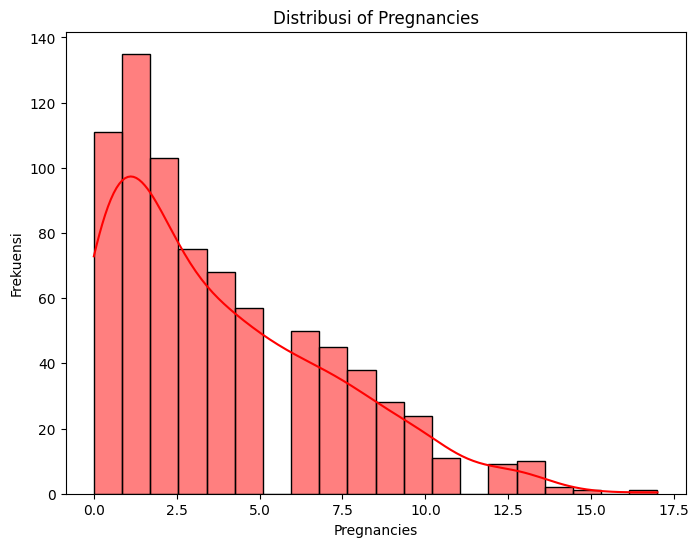

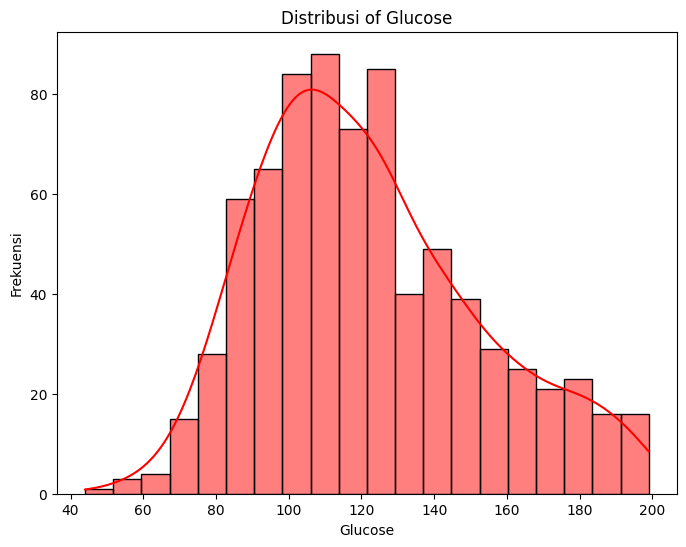

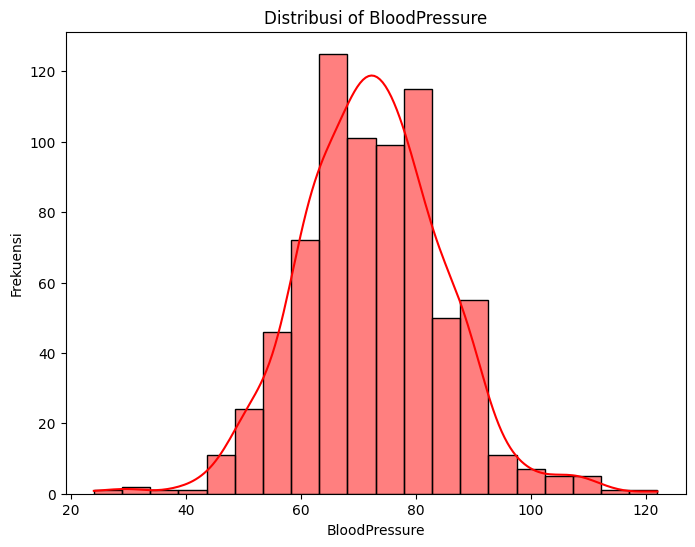

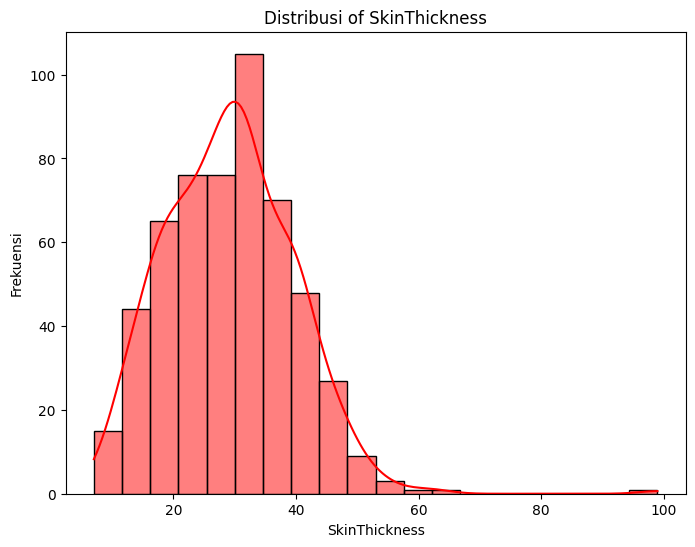

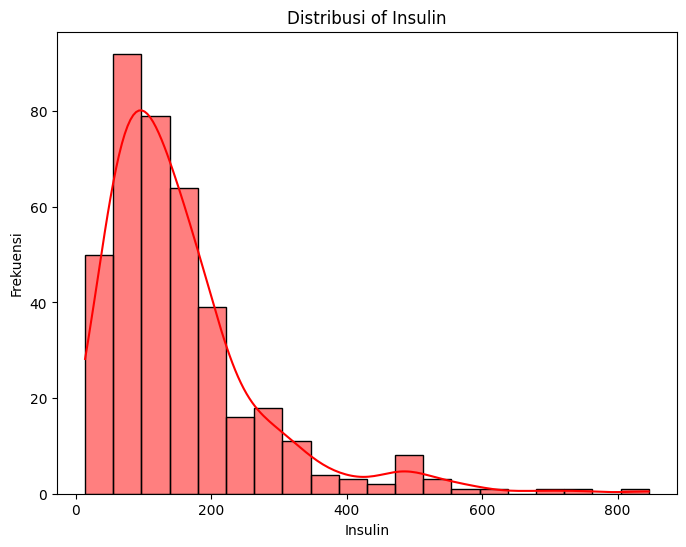

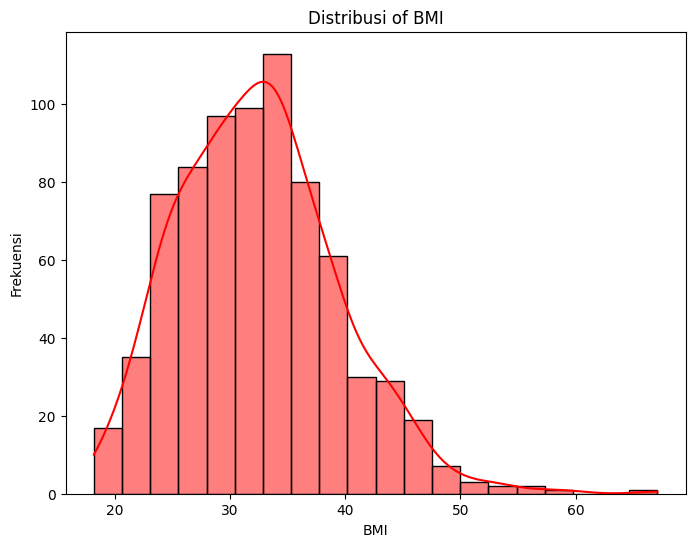

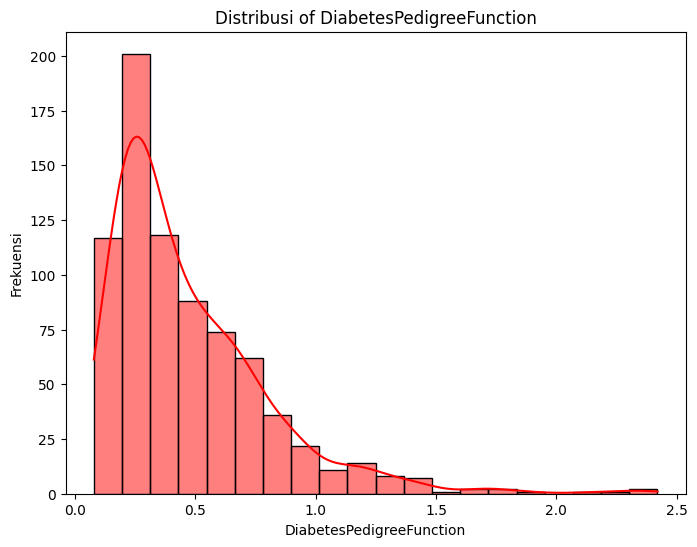

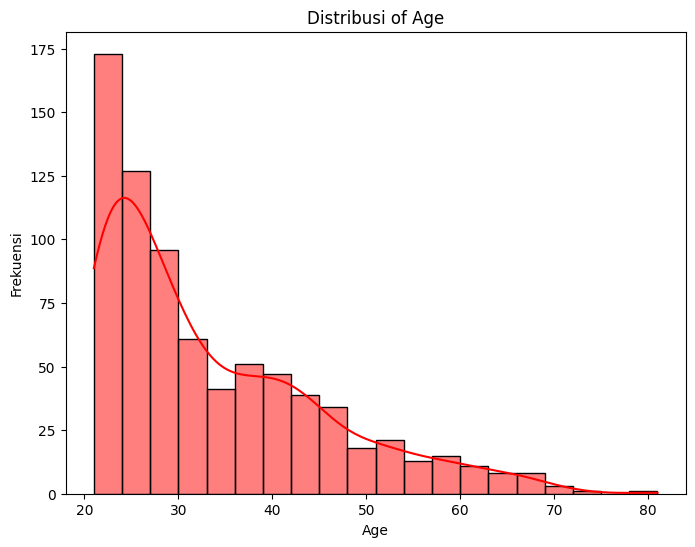

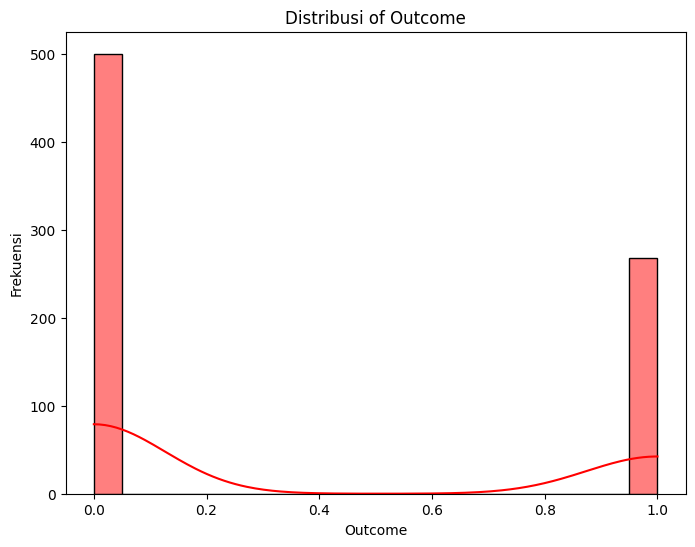

In [13]:
for col in df:
  plt.figure(figsize=(8,6))
  sns.histplot(df[col], kde=True, color = 'red', bins = 20)
  plt.title(f'Distribusi of {col}')
  plt.xlabel(col)
  plt.ylabel("Frekuensi")

  plt.show()

#Cek Outlier

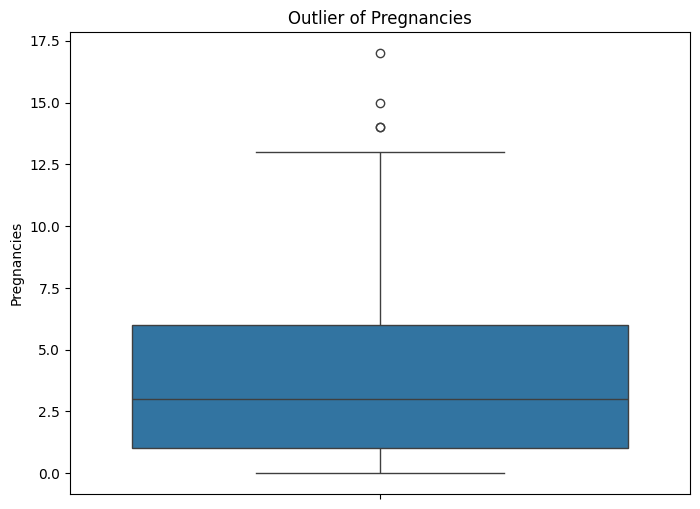

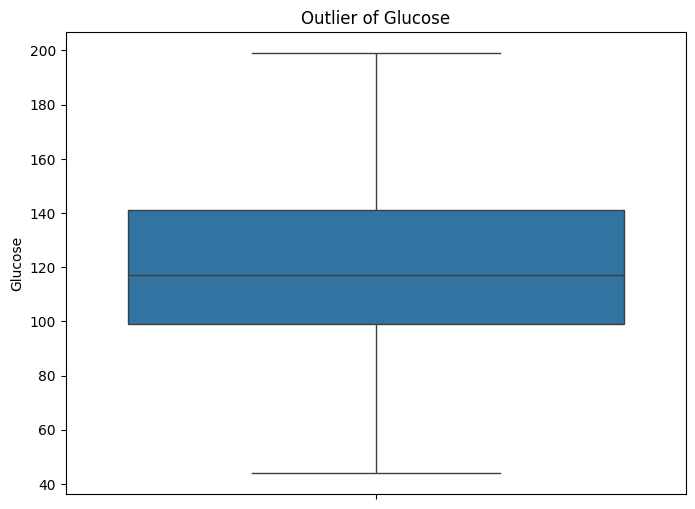

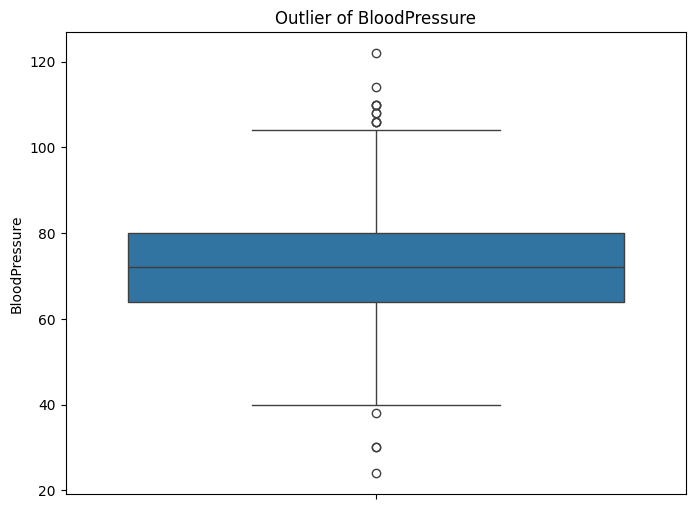

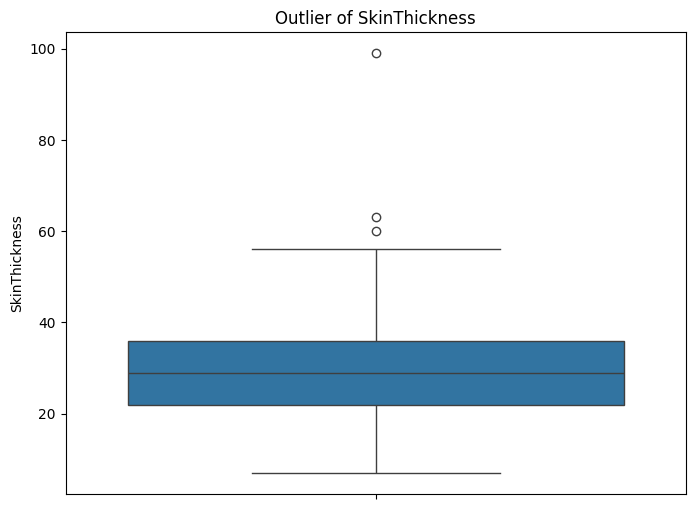

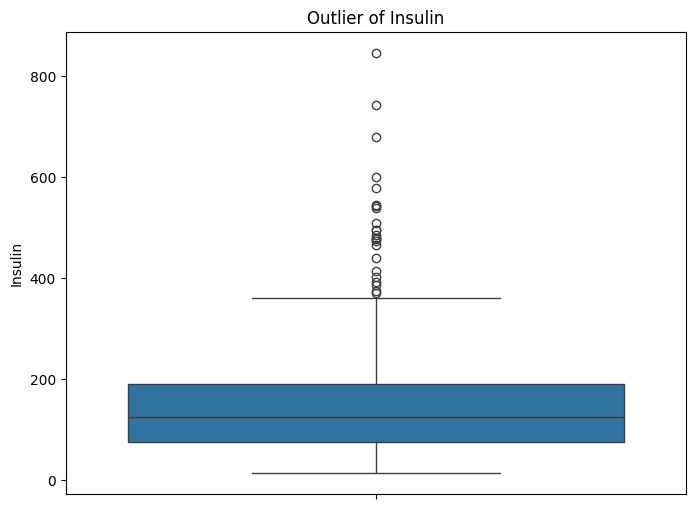

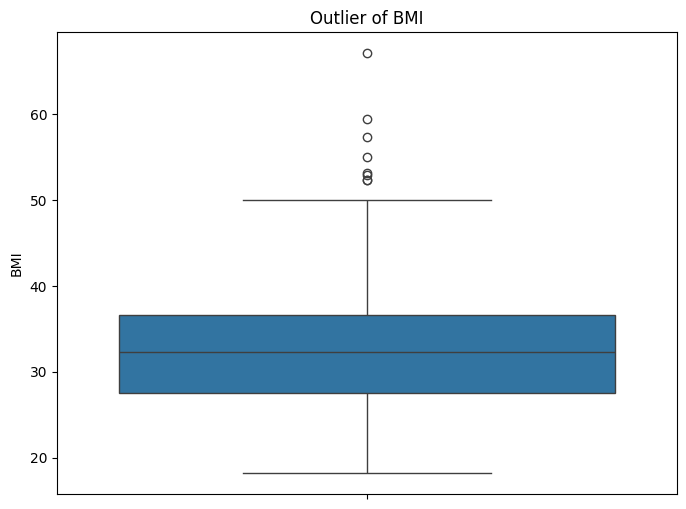

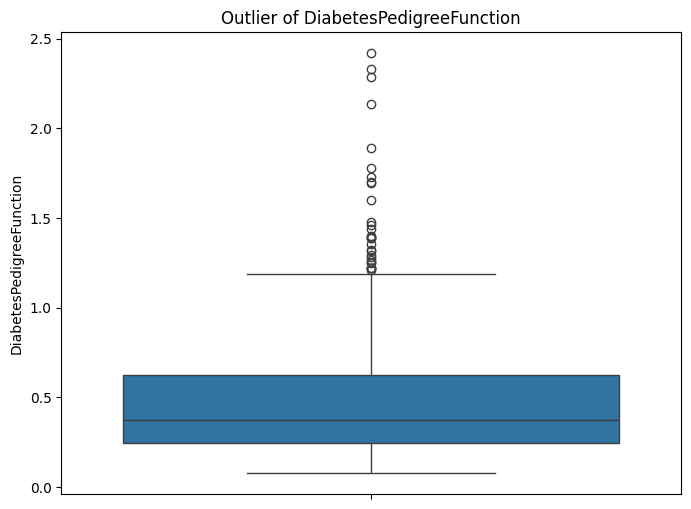

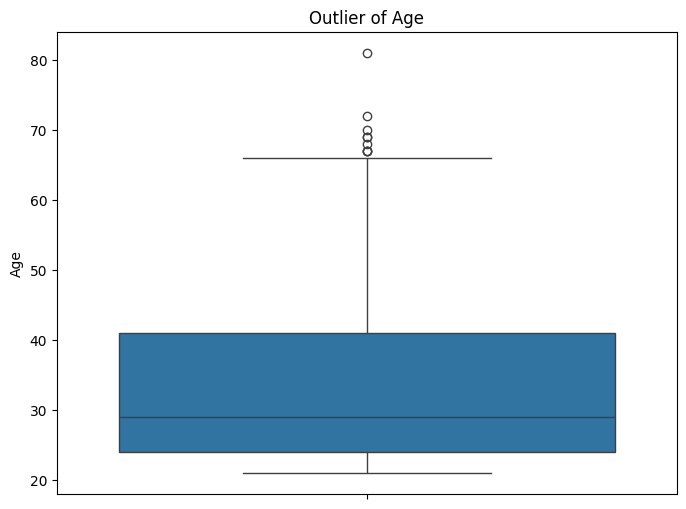

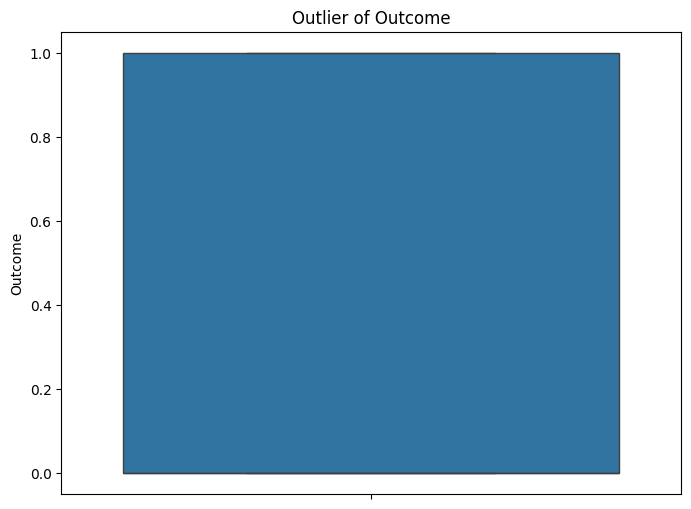

In [14]:
for col in df:
  plt.figure(figsize=(8,6))
  sns.boxplot(y =df[col])
  plt.title(f'Outlier of {col}')
  plt.show()

In [15]:
  Q1  = df['Pregnancies'].quantile(0.25)
  Q3 = df['Pregnancies'].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - (1.5*IQR)
  upper_bound = Q3 + (1.5*IQR)

  outliers = df[(df['Pregnancies'] < lower_bound) | (df['Pregnancies'] > upper_bound)]
  print(f'Outlier pada kolom {['Pregnancies']} : {len(outliers)}')
  print(f"persenan outlier: {(len(outliers)/len(df['Pregnancies']))*100:.2f}%")
  print(f'{outliers['Pregnancies'].sort_values().values}\n')

Outlier pada kolom ['Pregnancies'] : 4
persenan outlier: 0.52%
[14 14 15 17]



In [16]:
for col in df:
  Q1  = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - (1.5*IQR)
  upper_bound = Q3 + (1.5*IQR)

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(f'Outlier pada kolom {col} : {len(outliers)}')
  print(f"persenan outlier: {(len(outliers)/len(df))*100:.2f}%")
  print(f'{outliers[col].sort_values().values}\n')


Outlier pada kolom Pregnancies : 4
persenan outlier: 0.52%
[14 14 15 17]

Outlier pada kolom Glucose : 0
persenan outlier: 0.00%
[]

Outlier pada kolom BloodPressure : 14
persenan outlier: 1.82%
[ 24.  30.  30.  38. 106. 106. 106. 108. 108. 110. 110. 110. 114. 122.]

Outlier pada kolom SkinThickness : 3
persenan outlier: 0.39%
[60. 63. 99.]

Outlier pada kolom Insulin : 24
persenan outlier: 3.12%
[370. 375. 387. 392. 402. 415. 440. 465. 474. 478. 480. 480. 485. 495.
 495. 510. 540. 543. 545. 579. 600. 680. 744. 846.]

Outlier pada kolom BMI : 8
persenan outlier: 1.04%
[52.3 52.3 52.9 53.2 55.  57.3 59.4 67.1]

Outlier pada kolom DiabetesPedigreeFunction : 29
persenan outlier: 3.78%
[1.213 1.222 1.224 1.224 1.251 1.258 1.268 1.282 1.292 1.318 1.321 1.353
 1.39  1.391 1.394 1.4   1.441 1.461 1.476 1.6   1.698 1.699 1.731 1.781
 1.893 2.137 2.288 2.329 2.42 ]

Outlier pada kolom Age : 9
persenan outlier: 1.17%
[67 67 67 68 69 69 70 72 81]

Outlier pada kolom Outcome : 0
persenan outlier: 

##Cek korelasi

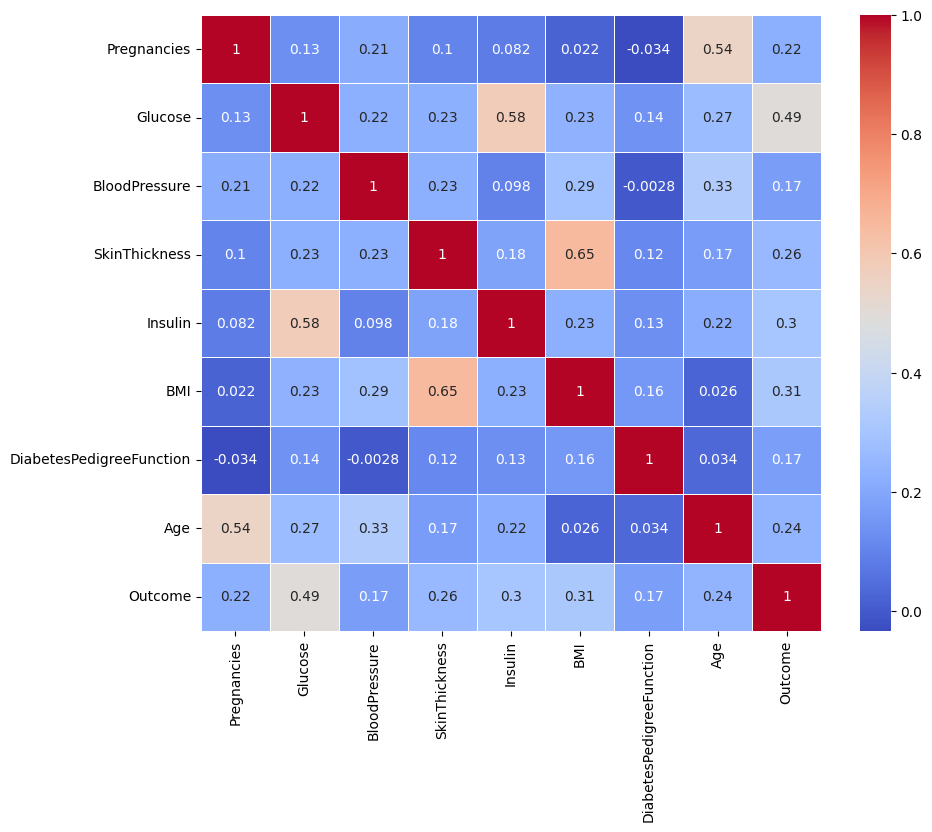

In [17]:
plt.figure(figsize = (10,8))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

##multikorelasi untuk feature extraction
1. Pregnancies dan Age
2. Glucose dan insulin
3. SkinThic dan BMI

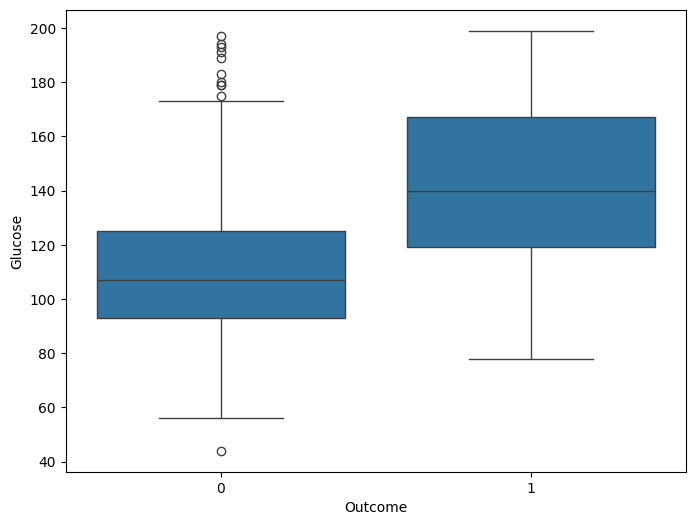

In [18]:
plt.figure(figsize=(8,6))

sns.boxplot(
    data = df,
    x = 'Outcome',
    y = 'Glucose'
)

plt.show()

/tmp/ipython-input-334314568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='Glucose', data=df, palette='muted')


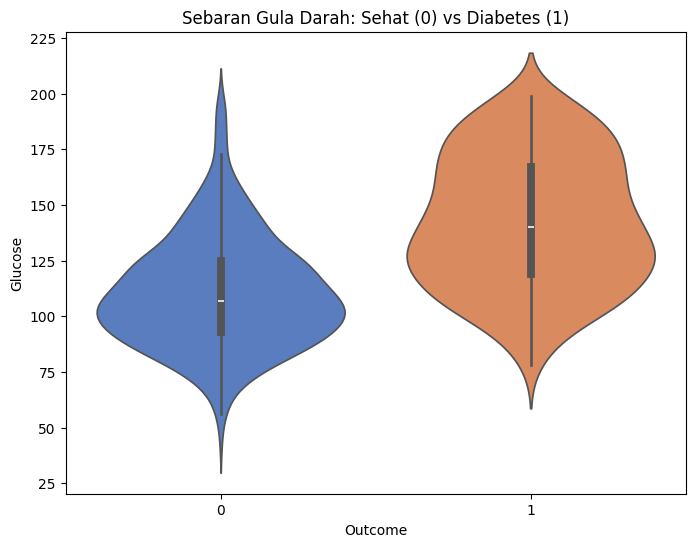

In [19]:
plt.figure(figsize=(8,6))

sns.violinplot(x='Outcome', y='Glucose', data=df, palette='muted')

plt.title('Sebaran Gula Darah: Sehat (0) vs Diabetes (1)')
plt.show()

##Handling Missing Value

In [20]:
from sklearn.impute import SimpleImputer
blood_impute = SimpleImputer(missing_values=np.nan, strategy='mean')
blood_impute.fit(df[['BloodPressure']])
df['BloodPressure'] = blood_impute.transform(df[['BloodPressure']]).ravel()

In [21]:
median_impute = SimpleImputer(missing_values=np.nan, strategy='median')
median_impute.fit(df[['SkinThickness', 'Glucose', 'Insulin', 'BMI']])
df[['SkinThickness', 'Glucose', 'Insulin', 'BMI']] = median_impute.transform(df[['SkinThickness', 'Glucose', 'Insulin', 'BMI']])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [23]:
df['BMI_SKIN'] = df['BMI'] * df['SkinThickness']
df['Glucose_insulin'] = df['Glucose'] * df['Insulin']
df['Pregnancies_Age'] = df['Pregnancies'] * df['Age']

In [24]:
df['Pregnancies'] = np.log1p(df['Pregnancies'])
df['Age'] = np.log1p(df['Age'])
df['BMI'] = np.log1p(df['BMI'])
df['Insulin'] = np.log1p(df['Insulin'])
df['Glucose'] = np.log1p(df['Glucose'])
df['DiabetesPedigreeFunction'] = np.log1p(df['DiabetesPedigreeFunction'])
df['SkinThickness'] = np.log1p(df['SkinThickness'])
df['BMI_SKIN'] = np.log1p(df['BMI_SKIN'])
df['Glucose_insulin'] =  np.log1p(df['Glucose_insulin'])
df['Pregnancies_Age'] = np.log1p(df['Pregnancies_Age'])

In [25]:
standar_cols = ['Pregnancies', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Glucose', 'BMI_SKIN', 'Glucose_insulin', 'Pregnancies_Age']

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis = 1)
y = df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

preprocessing = ColumnTransformer(transformers=[('standar', StandardScaler(), standar_cols)], remainder='passthrough')



In [28]:
from xgboost import XGBClassifier

pipeline_xgb= Pipeline([
    ('preprocessing', preprocessing), ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))])

pipeline_xgb.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:10:53] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('standar', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score

In [30]:
y_pred_train_xgb = pipeline_xgb.predict(X_train)
y_pred_xgb = pipeline_xgb.predict(X_test)

accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
accuracy_test_xgb = accuracy_score(y_test, y_pred_xgb)

classification_train_xgb = classification_report(y_train, y_pred_train_xgb)
classification_test_xgb = classification_report(y_test, y_pred_xgb)

confusion_train_xgb = confusion_matrix(y_train, y_pred_train_xgb)
confusion_test_xgb = confusion_matrix(y_test, y_pred_xgb)

In [31]:
print(f'akurasi train : {accuracy_train_xgb}')
print(f'akurasi test : {accuracy_test_xgb}')

print(f'\nconfusion train : \n{confusion_train_xgb}')
print(f'\nconfusion test : \n{confusion_test_xgb}')


print(f'\nclassification train : \n{classification_train_xgb}')
print(f'\nclassification test : \n{classification_test_xgb}')

akurasi train : 1.0
akurasi test : 0.7532467532467533

confusion train : 
[[401   0]
 [  0 213]]

confusion test : 
[[76 23]
 [15 40]]

classification train : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614


classification test : 
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.63      0.73      0.68        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.76      0.75      0.76       154



/tmp/ipython-input-1336516011.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data = importance_df, palette='viridis')


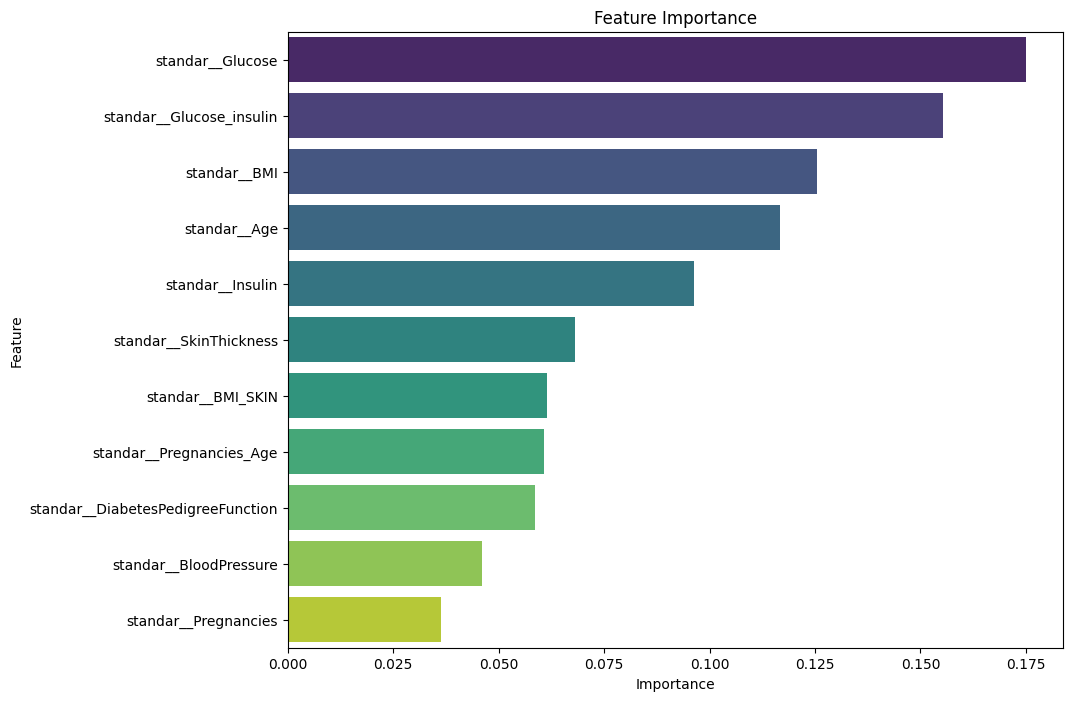

In [32]:
model_xgb = pipeline_xgb.named_steps['model']
importance = model_xgb.feature_importances_
preprocessing = pipeline_xgb.named_steps['preprocessing']


feature_names = preprocessing.get_feature_names_out()


importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data = importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()


In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
pipeline_xgb_tuned= Pipeline([
    ('preprocessing', preprocessing), ('model', XGBClassifier(eval_metric='logloss', random_state=42))])

param_dist = {
    'model__n_estimators': [100,200,300],
    'model__learning_rate': [0.01, 0.5, 0.1,0.2],
    'model__max_depth': [3,4,5,6],
    'model__scale_pos_weight': [1,2,3],
    'model__subsample':[0.7, 0.8, 0.9],
    'model__colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_tuned = RandomizedSearchCV(
    estimator = pipeline_xgb_tuned,
    param_distributions = param_dist,
    n_iter = 50,
    scoring = 'recall',
    cv = 5,
    verbose = 1,
    random_state = 42,
    n_jobs = 1
)

xgb_tuned.fit(X_train,y_train)

print(f"\n Parameter Terbaik: {xgb_tuned.best_params_}")
print(f" Skor Recall Training Rata-rata: {xgb_tuned.best_score_:.2f}")

best_model = xgb_tuned.best_estimator_
y_pred_train_tuned = best_model.predict(X_train)
y_pred_tuned = best_model.predict(X_test)

print("\n=== PERFORMA TUNING===")
print(f'CM train : {confusion_matrix(y_train, y_pred_train_tuned)}\n')
print(classification_report(y_train, y_pred_train_tuned))

print(f'CM test : {confusion_matrix(y_test, y_pred_tuned)}\n')
print(classification_report(y_test, y_pred_tuned))




Fitting 5 folds for each of 50 candidates, totalling 250 fits

 Parameter Terbaik: {'model__subsample': 0.7, 'model__scale_pos_weight': 3, 'model__n_estimators': 200, 'model__max_depth': 3, 'model__learning_rate': 0.01, 'model__colsample_bytree': 0.8}
 Skor Recall Training Rata-rata: 0.87

=== PERFORMA TUNING===
CM train : [[274 127]
 [ 12 201]]

              precision    recall  f1-score   support

           0       0.96      0.68      0.80       401
           1       0.61      0.94      0.74       213

    accuracy                           0.77       614
   macro avg       0.79      0.81      0.77       614
weighted avg       0.84      0.77      0.78       614

CM test : [[58 41]
 [ 7 48]]

              precision    recall  f1-score   support

           0       0.89      0.59      0.71        99
           1       0.54      0.87      0.67        55

    accuracy                           0.69       154
   macro avg       0.72      0.73      0.69       154
weighted avg       0.7

In [35]:
y_pred_proba = best_model.predict_proba(X_test)[:,1]
thresholds = [0.5, 0.6, 0.65, 0.7, 0.75, 0.8]

print(f"{'Threshold':<10} {'Recall':<10} {'Precision':<10} {'Akurasi':<10} {'TP':<5} {'FP (Salah Tuduh)':<15}")
print("-" * 70)

for th in thresholds:
    y_pred_th = (y_pred_proba >= th).astype(int)

    rec = recall_score(y_test, y_pred_th)
    prec = precision_score(y_test, y_pred_th)
    acc = accuracy_score(y_test, y_pred_th)

    cm = confusion_matrix(y_test, y_pred_th)
    tp = cm[1, 1]
    fp = cm[0, 1]

    print(f"{th:<10} {rec:.2f}       {prec:.2f}       {acc:.2f}       {tp:<5} {fp:<15}")

Threshold  Recall     Precision  Akurasi    TP    FP (Salah Tuduh)
----------------------------------------------------------------------
0.5        0.87       0.54       0.69       48    41             
0.6        0.85       0.59       0.73       47    33             
0.65       0.82       0.61       0.75       45    29             
0.7        0.71       0.64       0.75       39    22             
0.75       0.62       0.69       0.77       34    15             
0.8        0.53       0.85       0.80       29    5              


In [36]:
best_threshold = 0.65

y_pred_proba_train = best_model.predict_proba(X_train)[:,1]

y_pred_proba_train_th = (y_pred_proba_train >= best_threshold).astype(int)

print(f"\n=== PERFORMA TRAIN (Threshold {best_threshold}) ===")
print(classification_report(y_train, y_pred_proba_train_th))

cm_train = confusion_matrix(y_train, y_pred_proba_train_th)
print(f"Confusion Matrix Train: \n{cm_train}")
print(f"\nTP (Sakit -> Terdeteksi): {cm_train[1, 1]}")
print(f"FN (Sakit -> Lolos)     : {cm_train[1, 0]}")


=== PERFORMA TRAIN (Threshold 0.65) ===
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       401
           1       0.73      0.85      0.78       213

    accuracy                           0.84       614
   macro avg       0.82      0.84      0.83       614
weighted avg       0.85      0.84      0.84       614

Confusion Matrix Train: 
[[333  68]
 [ 32 181]]

TP (Sakit -> Terdeteksi): 181
FN (Sakit -> Lolos)     : 32


In [39]:
best_threshold = 0.65

y_pred_proba = best_model.predict_proba(X_test)[:,1]

y_pred_proba_th = (y_pred_proba >= best_threshold).astype(int)

print(f"\n=== PERFORMA Test (Threshold {best_threshold}) ===")
print(classification_report(y_test, y_pred_proba_th))

cm_test = confusion_matrix(y_test, y_pred_proba_th)
print(f"Confusion Matrix Test: \n{cm_test}")
print(f"\nTP (Sakit -> Terdeteksi): {cm_test[1, 1]}")
print(f"FN (Sakit -> Lolos)     : {cm_test[1, 0]}")


=== PERFORMA Test (Threshold 0.65) ===
              precision    recall  f1-score   support

           0       0.88      0.71      0.78        99
           1       0.61      0.82      0.70        55

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.78      0.75      0.75       154

Confusion Matrix Test: 
[[70 29]
 [10 45]]

TP (Sakit -> Terdeteksi): 45
FN (Sakit -> Lolos)     : 10


##Simpan Model

In [38]:
import joblib
file_name = 'model_deteksi_diabetes.pkl'

joblib.dump(best_model,file_name)


print(f'Model berhasil disimpan {file_name}')

Model berhasil disimpan model_deteksi_diabetes.pkl
